# Week 8. Object-Oriented Programming

### Python is an *object-oriented* programming language, which means:
- Programs include class and method definitions.
- Most of the computation is expressed in terms of operations on objects.
- Objects often represent things in the real world which may be more complex than numbers for example, and methods often correspond to interactions between objects or with theirself.

## Classes, Objects, and Attributes

In [1]:
import numpy as np

A **class** is a definition of the structure that we want. Similar to a function, it is defined as a block of code, starting with the class statement. The syntax of defining a class is:

```python
class ClassName(superclass-optional):
    
    def __init__(self, arguments):
        # define or assign object attributes
        
    def other_methods(self, arguments):
        # body of the method

```
Note: the definition of a class is very similar to a function. It needs to be instantiated first before you can use it. For the class name, it is standard convention to use "CapWords." The **superclass** is used when you want create a new class to **inherit** the attributes and methods from another already defined class. We will talk more about **inheritance** in the next section. The **\_\_init\_\_** is one of the special methods in Python classes that is run as soon as an object of a class is instantiated (created). It assigns initial values to the object before it is ready to be used. Note the two underscores at the beginning and end of the
`init`, indicating this is a special method reserved for special use in the language.
In this `init` method, you can assign attributes directly when you create the object. The `other_methods`
functions are used to define the instance methods that will be applied on the attributes, just like functions we discussed before. You may notice that there is a parameter `self` for defining this method in the class. Why? A class instance method must have this extra argument as the first argument when you define it. This particular argument refers to the object itself; conventionally, we use `self` to name it. Through this self parameter, instance methods can freely access attributes and other methods in the same object. When we define or call an instance method within a class, we need to use this self parameter. Let us see an example below.

**EXAMPLE:** Let instantiate an empty class called point which represents a point in 3 dimensional space. 

In [3]:

class Point():
    """Represents a point in 3-D space."""


To make an *object* of this class simply assign a variable.


In [4]:
a = Point()

If you try to check out what a is you see that it is referencing the Point object you defined:

In [6]:
print(a)

$a$ is an ***object*** or *instance* of the class Point and it is stored in my memory at 0x110ed4910

## Attributes

*Atrributes* are named elements of an object.

These attributes can be accessed by all the other methods (functions) defined in the class with `self.attribute`.

You can assign values to the instance $a$ after it has been created with with the "." method :

In [9]:
#set some coordinates:
a.x = 3
a.y = 4
a.z = 5
print(a.z)

5


Does this seem familiar?  `n = a.x` :  `m = np.pi`

In [10]:
print( a, a.x, a.y, a.z )

<__main__.Point object at 0x10a750250> 3 4 5


### Attributes are mutable:


In [11]:
a.x = a.x + 5.  ## --> will work
a.x +=5
print( a.x )

13.0


### Initializing an instance of a class

The __init__ *dunder method* of a class will initialize the attributes when we create an object. We need to pass in the initial value for x, y, and z. We can use KWARGS so if we leave one out, it is defined by default.

**EXAMPLE:** 
- Redefine the class *Point* with an `__init__` method that is initialized with x, y, and z attributes,  each with a default value of zero.
- Create an instance of point $a$ with attributes x = 3, y = 4, and z =  5.
- Print attributes x, y, and z.

In [12]:
class Point:

    def __init__(self,x = None,y = None,z = None):
        """Initializes object of class Point with x,y,z coord."""
        self.x = x
        self.y = y
        self.z = z

    

In [17]:
a = Point(1,4,0)

print(a.x,a.y,a.z)

1 4 0


### *Pure functions* 
do not change the objects passed to them and have no other effect on there attributes. They only return a value (which could be another object).

**EXAMPLE:** 
- Create a pure function that will determine the distance from the origin to a point.
- Print the distance from the origin to your point $a$.

In [18]:
def distance(point):
    dist = np.sqrt(point.x**2 + point.y**2 + point.z**2)
    return dist

In [19]:
print(distance(a))

4.123105625617661


**EXAMPLE:** 
- Create a pure function `one_step` that will return a new point $b$ with 1 added to every coordinate.

In [20]:
def one_step(point):
    step = Point()
    step.x = point.x + 1
    step.y = point.y + 1
    step.z = point.z + 1
    return step


In [21]:
c = Point(x = 0,y = 2,z = 33)
print(c.x,c.y,c.z)

0 2 33


In [22]:
print(a.x,a.y,a.z)

b = one_step(a)

print(b.x,b.y,b.z)

1 4 0
2 5 1


### *Modifiers* 
functions that modify the objects they get as parameters:


In [23]:
def change_the_point( my_point ):
    """Subtracts 1 from each coordinate of a point."""
    
    # change the point's location by 3 and 7:
    my_point.x = my_point.x - 1
    my_point.y = my_point.y - 1
    my_point.z = my_point.z - 1
    
    # return the new point
    return my_point

In [24]:
change_the_point(a)
print(a.x,a.y,a.z)

0 3 -1


### *Methods*
Functions that are associated with a particular class.

- Methods are defined inside a class definition so as to make the relationship between the class and the method explicit.
- Methods are contained in the instance and refer to the instance as *self*. Self is *always* the first argument of any method.

**EXAMPLE:** 
- Let's add a *method* `print_point` that prints the x, y, and z coordinates of our point in a descriptive format.
- Create a new instance of Point, $c$, with x = -1, y = 5, and z = -3.
- call the `print_point` method for $c$.
- While we are at it, let's copy/modify our `distance_point` in to make it a method in our class of Point.
- Make the method `distance_point` store the distance from the origin as an *attribute*.
- Call `distance_point` and print the distance.

In [26]:
class Point:
    """Represents a point in 2-D space."""

    def __init__(self,x = 0, y = 0, z = 0):
        self.x = x
        self.y = y
        self.z = z   
    
    def distance_point(self):
        dist = np.sqrt(self.x**2 + self.y**2 + self.z**2)
        self.distance = dist
        return dist
    
    #add a print_point method:

    def print_point(self):
        """Prints the coordinates in a descriptive way."""
        print(f"The coordinates of this point are x: {self.x:.2f}, y: {self.y:.2f}, z: {self.z:.2f}.\n")


In [28]:
c = Point(-1,5,-3)
c.print_point()

The coordinates of this point are x: -1.00, y: 5.00, z: -3.00.



In [27]:
a = Point(1,2,3)
print(a.distance_point())

3.7416573867739413


In [29]:
print(a.x)
print(c)

1


### Other Dunder Methods: String representation of an object.

You can also use the `__str__` Dunder method to create the string representation of instances of a class. This is what the `print()` function will return to the screen. This is generally a better implimentation than our `print_point` method.

In [39]:
class Point:
    """Represents a point in 2-D space."""

    def __init__(self,x = 0, y = 0, z = 0):
        self.x = x
        self.y = y
        self.z = z

    def __str__(self):
        return f"3D coordinate: ({self.x},{self.y},{self.z})"
    
    
    def distance_point(self):
        dist = np.sqrt(self.x**2 + self.y**2 + self.z**2)
        self.distance = dist
        return dist

In [40]:
d = Point(1,2,3)

print(d)
print(d)
print(d)

3
3
3


### Practice:

- Make a class *Time* that *initiallizes* with attributes hour, minute, second with default values of 0.
- Define the `__str__` method so that it prints the time in the format of a digital clock.
- Make an instance called $tt$ with the current time.

In [11]:
#Write it!
class Time:

    def __init__(self,hour = 0,minute = 0,second = 0):
        """
        informative doc string...
        """

        self.hour = hour
        self.minute = minute
        self.second = second

    def __str__(self):

        return '%.2d:%.2d:%.2d' %(self.hour, self.minute, self.second )

In [12]:
#Test it!
tt = Time(1,65)
print(tt)

01:65:00


**EXAMPLE:** 
- Make a (pure) function that adds two given times
- Assume you go to the movies at 9:45 pm and the movie is 1h 35m long. When does it end? (Use your function)


In [13]:
def add_time_here(t1, t2):
    
    sumt = Time()

    sumt.hour = t1.hour + t2.hour
    sumt.minute = t1.minute + t2.minute
    sumt.second = t1.second + t2.second
        
    return sumt
    

In [14]:
# initiate start time:
start = Time()
start.hour = 9
start.minute = 45
start.second = 0

print( start )

# and duration time:
duration = Time()
duration.hour = 1
duration.minute = 35
duration.second = 0

print( start )

# add them up to figure out when movie's done:
done = add_time_here(start, duration)

# print end time :
print( done )


09:45:00
09:45:00
10:80:00


Oops, we broke it! how do we fix this? we don't need 80min....
use if statements!

In [15]:
def add_time_improved(t1, t2): 
    sumt = Time()
    sumt.hour = t1.hour + t2.hour
    sumt.minute = t1.minute + t2.minute
    sumt.second = t1.second + t2.second

    if sumt.second >= 60:
        sumt.second = sumt.second - 60
        sumt.minute = sumt.minute + 1
        
    if sumt.minute >= 60:
        sumt.minute = sumt.minute - 60
        sumt.hour   = sumt.hour   + 1

    return sumt


# add them up to figure out when movie's done:
done = add_time_improved(start, duration)

# print end time :
print( done )

11:20:00


In [16]:
# let's collect some more modifiers for our time here:

def time_to_int( time ):
    
    minutes = time.hour * 60 + time.minute
    seconds = minutes   * 60 + time.second

    return seconds


def int_to_time( seconds ):

    time = Time()
    minutes,   time.second = divmod( seconds, 60 )
    time.hour, time.minute = divmod( minutes, 60 )

    return time

def add_time( t1, t2 ):

    seconds = time_to_int( t1 ) + time_to_int( t2 )
    
    return int_to_time( seconds )

def increment( time, seconds ):
    
    seconds = time_to_int( time ) + seconds
    
    return int_to_time( seconds )


In [17]:
#when are we done?
done = add_time(start, duration)

print( done )

# now let's get the end time and add 30,000 seconds to it....what time is that?
a = increment(done, 30000)
print( a )

11:20:00
19:40:00


**EXAMPLE:** Write a boolean function called is_after that takes two Time objects, t1 and t2, and returns:

- True if t1 follows t2 chronologically and False otherwise.
- Challenge: use try/raise instead of an if statement

In [18]:
def is_after(t1, t2):
    tot1 = t1.hour * 3600 + t1.minute * 60 
    tot2 = t2.hour * 3600 + t2.minute * 60 
    
    try:
        tot1 - tot2 > 0
        return "True"
    except:
        raise 
        print("False")
        
duration2 = Time()
duration3 = Time()


duration2.hour   = 1
duration2.minute = 35

duration3.hour   = 0
duration3.minute = 48

print( is_after( duration3, duration2 ) )

True


In [19]:
### or:

def is_after2(t1,t2):
    
    tot1 = t1.hour * 3600 + t1.minute * 60 
    tot2 = t2.hour * 3600 + t2.minute * 60 

    return tot1 > tot2


duration2 = Time()
duration3 = Time()


duration2.hour   = 1
duration2.minute = 35

duration3.hour   = 0
duration3.minute = 48

print( is_after2( duration2 , duration3 ) )

True


In [20]:
## Rewriting is_after in the class Time is slightly more complicated because it takes two 
## Time objects as parameters. In this case it is conventional to name the first parameter self
## and the second parameter other:


class Time: 
    def __init__(self, hour=0, minute=0, second=0): 
        self.hour = hour
        self.minute = minute
        self.second = second
    
    def __str__(self):
        return '%  .2d:%.2d:%.2d' % (self.hour, self.minute, self.second)
        
    def print_time(self): 
        print('%.2d:%.2d:%.2d' % (self.hour, self.minute, self.second ) )
        
    def is_after( self, other ):
        return self.time_to_int() > other.time_to_int()

    def time_to_int(self):
        minutes = self.hour * 60 + self.minute
        seconds = minutes   * 60 + self.second
        return seconds


In [21]:
start = Time(1,35)
end = Time()


#start.hour   = 1
#start.minute = 35

end.hour   = 10
end.minute = 48

print( end.is_after( start ) )  # is the end after the start? note that order can matter; see later


True


In [22]:
print( start.is_after( end ) )

False


In [23]:
print(start.time_to_int())
print(start)



5700
 01:35:00


### Tests
To help with debugging you can start building some tests for your parameters, e.g., is the time real/possible?

In [24]:
def valid_time(time):
    """Checks if a given time is real"""
    if time.hour < 0 or time.minute < 0 or time.second < 0:
        return False
    
    if time.minute >= 60 or time.second >= 60:
        return False
    
    return True

In [25]:
foo = Time()

foo.hour   = 1
foo.minute = 3
foo.second = -230

valid_time( foo )

False

In [26]:
foo = Time()

foo.hour   = 2
foo.minute = 3
foo.second = 23

valid_time( foo )

True

### Assert
You can then put this at the start of each function to check the arguments

In [31]:
t1 = Time(1,2,3)
t2 = Time(1,2,1)


In [33]:
# One way is to use an assertion:

def add_time( t1, t2 ):
    
    assert valid_time( t1 ) and valid_time( t2 )  #--> if one return false you get assertion error

    seconds = time_to_int( t1 ) + time_to_int( t2 )
    
    return int_to_time( seconds )


foo.second = 30

bar = add_time( foo, duration )

print( bar )


 03:38:30


In [59]:
foo2 = Time()

foo2.hour   = 1
foo2.minute = 3
foo2.second = 23

#print( valid_time( foo2 ) )

foo3 = Time()

foo3.hour   = 1
foo3.minute = 2
foo3.second = 17

#print( valid_time( foo3)  )


bar = add_time( foo2, foo3 )


bar.print_time()

02:05:40


In [84]:
# or raise an exception:

def add_time( t1, t2 ):
    
    if not valid_time( t1 ) or not valid_time( t2 ):
        raise ValueError("Invalid Time object in add_time()")
        
    seconds = time_to_int( t1 ) + time_to_int( t2 )
    
    return int_to_time( seconds )

foo.second = -230

bar = add_time( foo, duration )

done.print_time()

ValueError: Invalid Time object in add_time()

### Practice: 
Import timeclass from *timeclass.py*  It contains the full Time class from *Think Python*, plus the one function, int_to_time(),  that does not take an instance of the Time class as an argument. It's called timeclass.py and not time.py because there is already a Python module called time.py.

In [6]:
# Let's import timeclass:
import numpy as np

from timeclass import *

In [3]:
## Now, you can set the attributes in a new Time object: 

#before running it, what do you expect this gives? why?
time = Time(0,1,2)
time.print_time()

00:01:02


In [47]:
#what about this: 
time = timeclass.Time(9)
time.print_time()

#or this one?
time = timeclass.Time(9, 45)
time.print_time()


time = timeclass.Time(9, 45, 23)
time.print_time()


# You can print the time:

print(time)
# 09:45:23

09:00:00
09:45:00
09:45:23
09:45:23


The code will look more "natural".  We can add times to each other, we can add times to seconds or seconds to times, and we can print them, all using ordinary Python syntax:


In [7]:
start = Time( 9, 45, 23)
dur   = Time(10, 45, 23)
inter = 3600

print(start)
# 09:45:23
print(dur)
# 10:45:23

The time is:09:45:23
The time is:10:45:23


**EXAMPLE:**

In [9]:
print(start + dur)
# 20:30:46
print(start + inter)
# 10:45:23
print(inter + start)
# 10:45:23


The time is:20:30:46
The time is:10:45:23
The time is:10:45:23


It worked because in timeclass.py we have let the code know what to do when it sees the + operand (see line 75). This is called ***operator overloading***.

### Operator Overloading
Special (Dunder) methods that allow to change the behavior of operators on programmer-defined types. E.g., the "+" operator becomes an addition like this:


In [10]:
def __add__(self, other):    # when you see the + you will add the two like this:
    
    seconds = self.time_to_int() + other.time_to_int()
    
    return int_to_time(seconds)

For the two-parameter methods, you need to invoke it on one object and pass the other, and order might matter:

In [14]:
# e.g,:

end = start  + inter

print(end)
print( end.is_after( start ) )  # is the end after the start?

print( start.is_after( end ) )  # or is the start after the end?


# We don't directly call most of the methods anymore! They're called behind the scenes by the + operator and print().


The time is:10:45:23
True
False


### Practice: 

Make a class OpenReadFile that will open a file, read its contents and assign them to the appropriate variables. The class is meant to open files with the IDs and grades of students like the *practice_numpy_f22.dat* from some weeks ago. 
- Create an initialization function that will initiate the IDs, HW, Quiz, Midterm and Final grades and defines what the file to be read-in is.
- Create a function read_data that actually reads the data and assigns the data to the appropriate variables.

- Run it for the *practice_numpy_f22.dat* 

In [15]:
class OpenReadFile:

    """My very informative doc string describing the class blah blah..."""

    def __init__(self,filename = ''):
        self.IDs = np.zeros(2)
        self.HW = np.zeros(2)
        self.Quiz = np.zeros(2)
        self.Midterm = np.zeros(2)
        self.Final = np.zeros(2)
        self.filename = filename

    def read_data(self):
        student_data = np.loadtxt(self.filename)
        self.IDs = student_data[:,0]
        self.HW = student_data[:,1]
        self.Quiz = student_data[:,2]
        self.Midterm = student_data[:,3]
        self.Final = student_data[:,4]
    
        
        
        
    

In [20]:
mydata = OpenReadFile('practice_numpy_f22.dat')

In [27]:
print(mydata.IDs)
mydata.read_data()
print(mydata.IDs,mydata.HW)
print(mydata.__dict__.values())
print(mydata.HW)


[1. 2. 3. 4. 5. 6. 7. 8.]
[1. 2. 3. 4. 5. 6. 7. 8.] [8.4 7.1 9.2 7.7 8.1 8.9 9.7 6.4]
dict_values([array([1., 2., 3., 4., 5., 6., 7., 8.]), array([8.4, 7.1, 9.2, 7.7, 8.1, 8.9, 9.7, 6.4]), array([7.8, 6.4, 7.8, 9.8, 8.3, 5.8, 8.2, 7.7]), array([8.8, 6.8, 8.5, 7.8, 5.8, 8.2, 9.8, 6.8]), array([9.5, 6.9, 8.8, 8.5, 7.5, 8.3, 8.5, 7.5]), 'practice_numpy_f22.dat'])
[8.4 7.1 9.2 7.7 8.1 8.9 9.7 6.4]


### Practice:

- Read in file random_data_pickle.pickle (see the ***I/O, storing data, pickling, pandas, reading data*** lecture for how to do it).
-  If you know that it contains 3 columns, how do you unpickle the data into variable x,y, z in one line?
-   Plot your y- z vs x.
- Now read in file readin_pickle.pickle into variable data1. What is the shape of data1? What is the power of pickles?

### Methods which compare objects

Sometimes a method will need to compare or otherwise use two instances of an object or even two different objects. If this is the case, the object that does NOT contain the method is referred to as "other". The arguments of a method should begin with "self" and then "other."

Let's see some examples with a class of 2D vectors.

## Object-Oriented Programming Example: Vectors
Below is an example of a class consisting of 2-dimensional vectors. The class allows for the usual vector addition/subtraction, multiplication by a scalar, and the vector dot product.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pint
ureg = pint.UnitRegistry()

class vector2d:
    
    """Class of 2-D vectors with x and y components allowing vector addition,
    subtraction, multiplication (dot/scalar product), and muliplication by a scalar.
    
    Immediately uses the x and y components to determine the magnitude and angle
    counterclockwise from the +x axis and stores them as attributes
    
    mag: magnitude
    angle: angle
    
    The attribute angle is in radians by default unless the KWARG: deg is set.
    """
    
    #initialize a vector:
    
    def __init__(self, x=0, y=0, label='vec', units = ureg.meter,deg = None):
        #Set basic attributes:
        self.x = x
        self.y = y
        self.deg = deg
        self.label = label
        self.units = units
        
        self.mag_angle()
        
    
    def mag_angle(self,deg = None):
        """Computes the magnitude and angle from vector components.
        set self.deg to compute the angle in degrees."""
        
        if deg is None:
            deg = self.deg
        else:
            self.deg = deg
        
        #Determine magnitude from Pythagorean Thm. and set attribute:
        
        self.mag = np.sqrt(self.x**2 + self.y**2) 
        
        #Now check for special cases before determining the angle:
        
        if self.x == 0:
            if self.y == 0:
                #This is a null vector
                angle = np.nan
            else:
                #This vector lies on the ±x-axis:
                if np.sign(self.y) == 1:
                    angle = np.pi/2
                else:
                    angle = 3*np.pi/2
        else:
        #x-component is nonzero:
            
            #angle if first quadrant:
            angle = np.arctan(np.abs(self.y/self.x))
                
            if self.x < 0 and self.y >= 0:
                #quadrant 2:
                angle = np.pi - angle
            elif self.x <0 and self.y<=0:
                #quadrant 3:
                angle += np.pi
            elif self.x > 0 and self.y <=0:
                #quadrant 4:
                angle = 2*np.pi - angle
            
        self.angle = angle
        
        if self.deg is not None:
            self.angle *= 180/np.pi
    
    
    #string representation of a vector:

    def __str__(self):
        """String representation of vector2d class."""
        
        x_comp_string = self.label+"_x: {0:0.3f}".format(self.x)+" "+str(self.units)
        y_comp_string = self.label+"_y: {0:0.3f}".format(self.y)+" "+str(self.units)
        mag_string = "||"+self.label+"||: {0:0.3f}".format(self.mag)+" "+str(self.units)
        
        angle_string = " at {0:0.3f}".format(self.angle) 
        
        if self.deg:
            angle_string += " deg. counterclockwise from +x."
        else:
            angle_string += " rad. counterclockwise from +x."
               
        return x_comp_string +" "+ y_comp_string + mag_string + angle_string
    
    
    #overload addition to perform vector addition:
    
    def __add__(self,other):
        """Performs vector addition."""
        
        x = self.x + other.x
        y = self.y + other.y
        if self.deg:
            deg = 1
        else:
            deg = 0
                    
        check_unit = self.x*self.units + other.x*other.units
        
        vsum = vector2d(x,y,label = self.label + '+' + other.label,\
                        deg = deg, units = self.units)

        return vsum

    #overload multiplication to multiply by a scalar if one element is a scalar OR
    #compute the dot product if both elements are vectors.
    
    def __mul__(self, other):
        
        if isinstance(other, (int, float)):  # Scalar multiplication:
            
            return vector2d(self.x * other, self.y * other, deg = self.deg,\
                           units = self.units)
        
        if isinstance(other, pint.Quantity): #Scalar multiplication with units:
            return vector2d(self.x * other.magnitude, self.y * other.magnitude,\
                            deg = self.deg, units = self.units*other.units)
        
        elif isinstance(other, vector2d):    # Dot product
            return self.x * other.x + self.y * other.y #this is a scalar (dot product)
        else:
            raise TypeError("Unsupported operand for multiplication")

    #Overload right hand multiplication:
            
    def __rmul__(self, other):
        #This is necessary for right-side multiplication by a scalar.
        if isinstance(other, (int, float,pint.Quantity)):  # Scalar multiplication:            
            out =  self.__mul__(other) 
        else:
             raise TypeError("Unsupported operand for multiplication")
        return out
    
    #Overload subtraction:
    
    def __sub__(self,other):
        #just multiply other by -1 before adding:
        neg_other = -1*other
        return self+neg_other

    #Rotate vector:
    
    def rotate(self,theta, deg = None):
        """Rotates an instance of vector2d through an angle theta in radians.
        Set KWARG deg to give theta in degrees."""
        
        if deg is not None:
            theta = np.radians(theta)
        
        R = np.array([[np.cos(theta),-np.sin(theta)],\
                           [np.sin(theta),np.cos(theta)]])
        
        v = np.array([self.x,self.y])
        vout = np.matmul(R,v)
        
        self.x = vout[0]
        self.y = vout[1]
        
        self.mag_angle()
        
        #End class vector2d.

        
        
#Define a function that creates a vector object from a magnitude and angle

def polar2vec(mag,angle,deg = None, label = '', units = ureg.meter):
        """Takes a magnitude and angle and creates an instance of vector2d
        optionally set KWARGS for:
        label: name of vector
        units: string of units for vector
        deg: accept angle in degrees instead of radians.
        """
        
        if deg is not None:
            angle = np.radians(angle)
            
        x = mag*np.cos(angle % (2*np.pi))
        y = mag*np.sin(angle % (2*np.pi))
        
        vector = vector2d(x,y,label = label, units = units, deg = deg)
        
        return vector

      
#Define a function that draws a vector object given some coordinates for the tail
#of the vector:

def drawvec(ax,pos,vector,color = 'k',width = 1):
    """Draws an instance of vector2d on a figure. Must instantiate figure and object
    using ax before drawing vector.
    
    Vectors can be overplotted"""
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    ax.quiver(pos.x,pos.y,vector.x,vector.y,\
             label = vector.label, color = color, width = width*3e-3,\
             headwidth = 4, headlength = 7, headaxislength = 4.5,\
             angles='xy', scale_units='xy', scale=1)
    
    #Set my default formatting:
    ax.tick_params( axis ='both', which ='both',\
                   length = 0 , labelsize=0 )
    
    ax.set_xticks( np.arange(-100, 101, 2.))
    ax.set_yticks(np.arange(-100,101,2.))
    ax.set_xlabel(vector.units)
    ax.set_ylabel(vector.units)
    
    ax.grid()
    return ax



In [29]:
a = vector2d(3,4,deg  = 1,label = 'A',units = ureg.meter)
b = vector2d(-7,1,deg = 1,label = 'B',units = ureg.meter)

print(a)

a.rotate(40,deg = 1)

print(a)



A_x: 3.000 meter A_y: 4.000 meter||A||: 5.000 meter at 53.130 deg. counterclockwise from +x.
A_x: -0.273 meter A_y: 4.993 meter||A||: 5.000 meter at 93.130 deg. counterclockwise from +x.


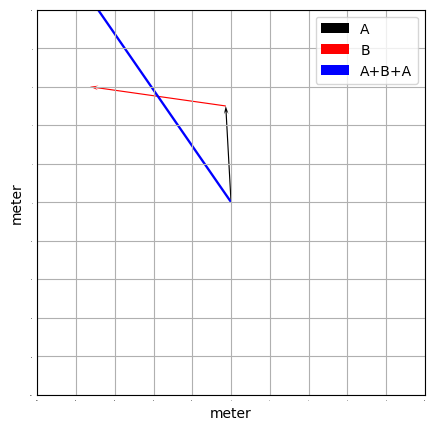

In [32]:
c = a + b
d = c + a
fig, ax = plt.subplots( figsize = ( 5, 5 ) )
origin = vector2d(0,0)
drawvec(ax,origin,a)
drawvec(ax,a,b,color = 'red')
drawvec(ax,origin,d,color = 'b',width = 2)

ax.set_xlim(-10,10)
ax.set_ylim(-10,10)

ax.legend()
plt.show()

## Newton's Laws Example Using Vectors & Systems of Equations

Suppose a block with a mass $m_1$ hangs from a string that wraps around a *massless* pulley and connects to a block of mass $m_2$ initially at rest on an incline with a slope of $\theta$. The coefficient of sliding friction between the incline and the bottom of the block is $\mu_k$. The block of mass $m_2$ is released, begins to slide, and accelerates down the incline while accelerating the block of mass $m_1$ upward at the same rate. 

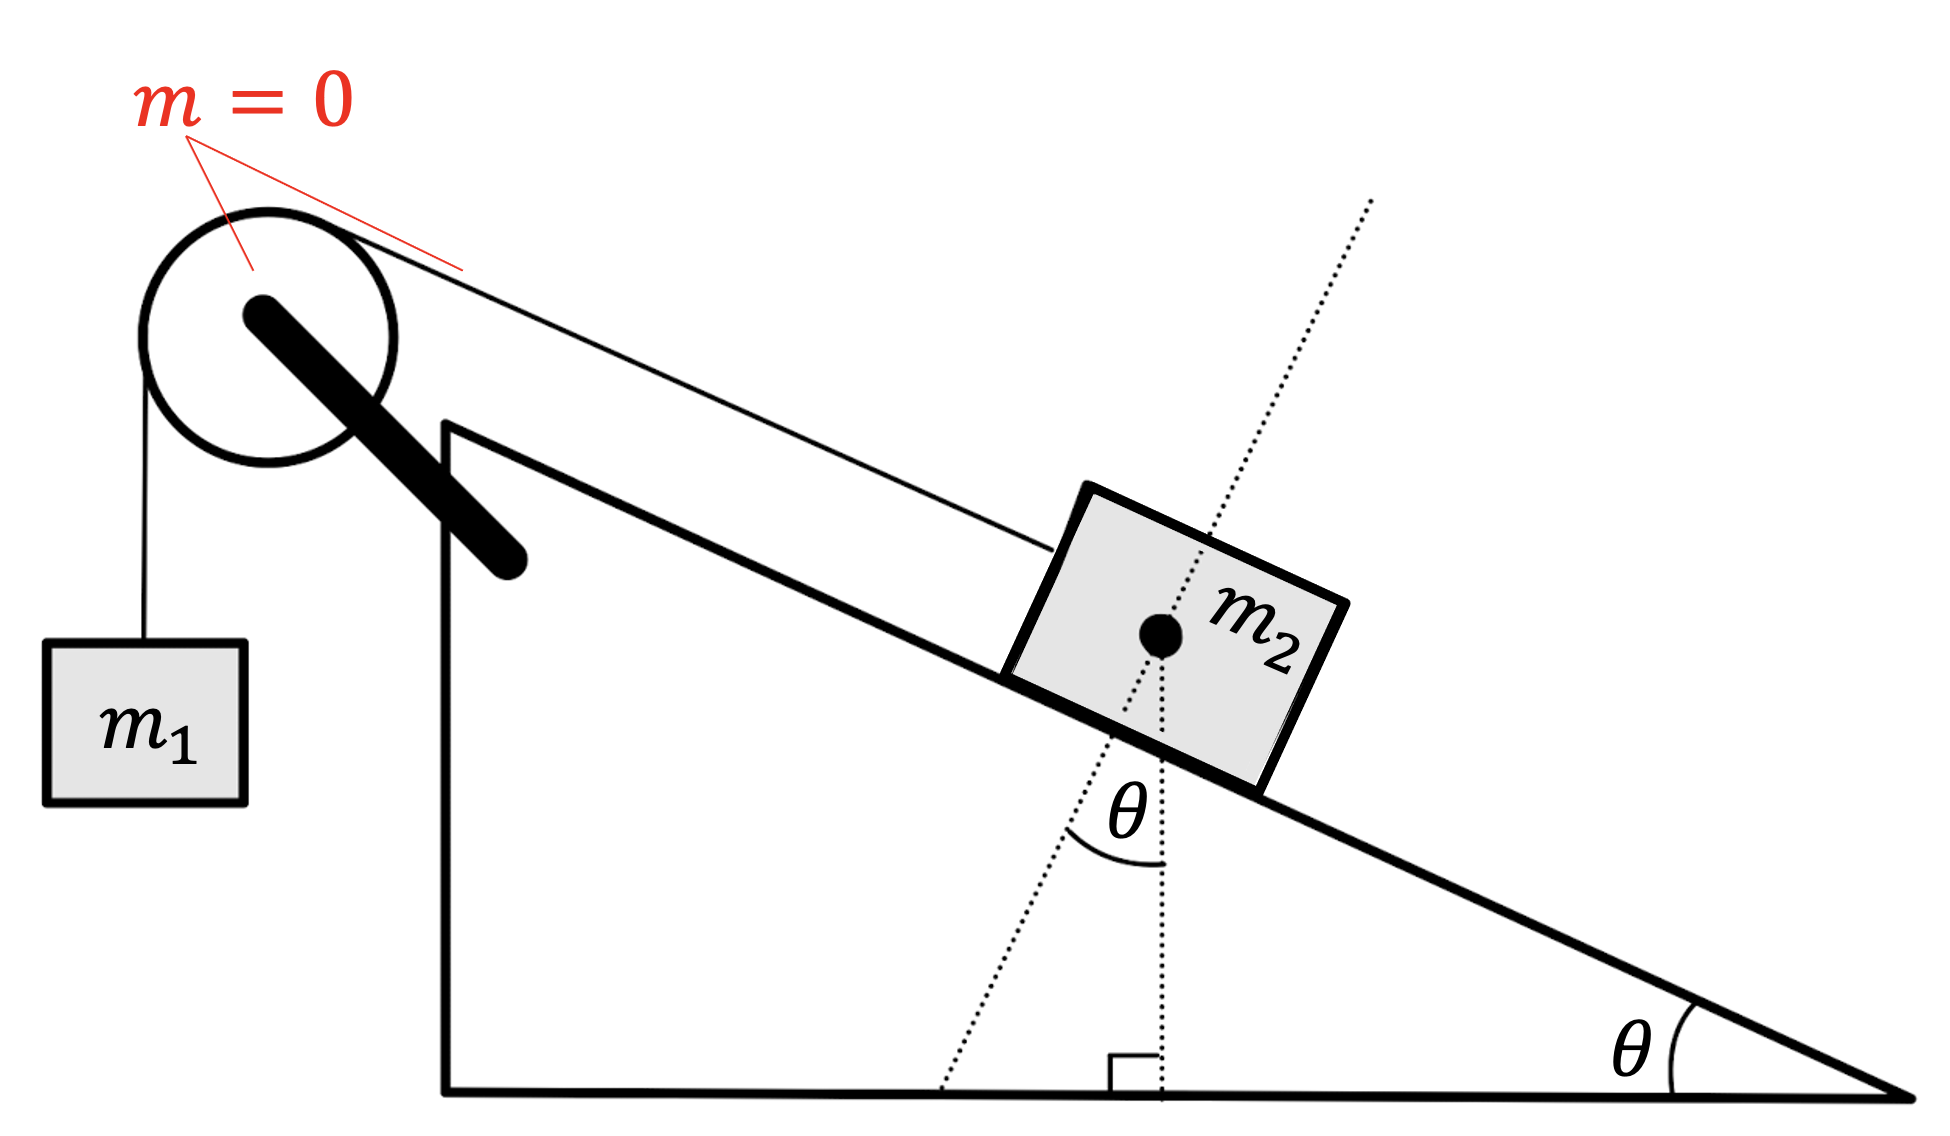

Suppose that $\theta = 30^\circ$, the coefficient of sliding friction is $\mu_k = 0.10$ and the masses of the two blocks are $m_1 = 0.5$ kg and $m_2 = 2.5$  kg. Determine the magnitude of the acceleration of the two blocks.

Let's start by drawing free body diagrams of both masses: $m_1$ and $m_2$:

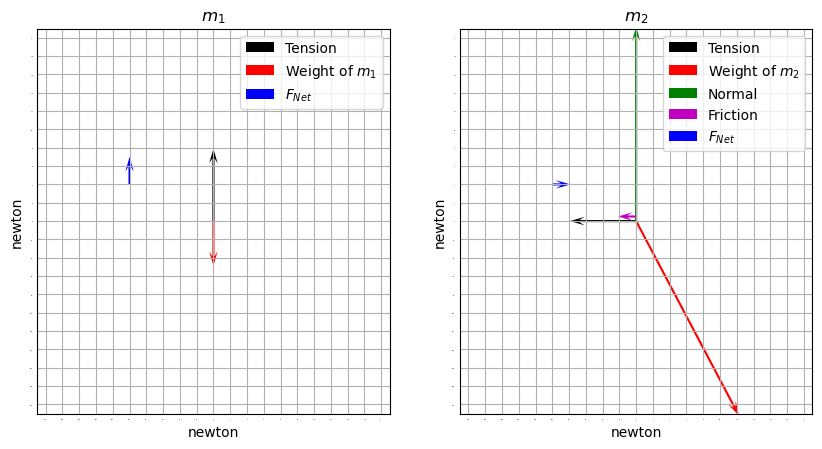

In [357]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = ( 10, 5 ) )

g  = 9.8 #m/s^2
m1 = 0.5 #kg
m2 = 2.5 #kg
muk = 0.1 
theta = 30. #deg
theta = np.radians(theta)

#m_1:

origin = vector2d(0,0)
fnetpos = vector2d(-10,4)
T = vector2d(0,w1_mag+3,label = "Tension",units = ureg.newton)

w1_mag = m1*g
w1 = vector2d(0,-w1_mag,label = "Weight of $m_1$",units = ureg.newton)
Fnetm1 = T+w1
Fnetm1.label = "$F_{Net}$"

drawvec(ax1,origin,T,width = 2)
drawvec(ax1,origin,w1,color = 'red',width = 2)
drawvec(ax1,fnetpos,Fnetm1,color = 'b',width = 2)

ax1.set_xlim(-21,21)
ax1.set_ylim(-21,21)
ax1.set_title("$m_1$")
ax1.legend()

#m_2:

#define vectors:
w2_mag = m2*g
w2  = polar2vec(w2_mag,300,deg = 1,label = "Weight of $m_2$",units = ureg.newton)

normal = vector2d(0,-w2.y,label = "Normal",units = ureg.newton)

friction = vector2d((T.y-w2.x)*0.5,0,label = "Friction",units = ureg.newton)
tension = vector2d(-T.y,0,\
                   label = "Tension",units = ureg.newton)

fnet2 = friction + tension + normal + w2
fnet2.label = "$F_{Net}$"

drawvec(ax2,origin,tension,width = 2)
drawvec(ax2,origin,w2,color = 'r',width = 2)
drawvec(ax2,origin,normal,color = 'g',width = 2)
or_fric = vector2d(0,0.5)
drawvec(ax2,or_fric,friction,color = 'm',width = 2)

drawvec(ax2,fnetpos,fnet2,color = 'b',width = 2)
ax2.set_xlim(-21,21)
ax2.set_ylim(-21,21)
ax2.set_title("$m_2$")

ax2.legend()


#Note that vectors are not to scale since we do not know the magnitude of the tension, 
#friction, etc.!
                     

### Rotating vectors
To rotate the components of a vector of a coordinate system in 2-dimensions through an angle $\theta$, we can multiply every $(A_x,A_y)$ array of vector components the rotation matrix:
 
$$
R = \begin{bmatrix}
\cos \theta & -\sin\theta \\
\sin \theta & \cos \theta  \\
\end{bmatrix}
$$

to get the new coordinates $(\tilde{A_x},\tilde{A_y})$:

$$
\left[\begin{array}{c} \tilde{A_x} \\ \tilde{A_y} \end{array}\right]=
\begin{bmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta \\
\end{bmatrix}
\left[\begin{array}{c} A_x \\A_y \end{array}\right]
$$

This is called an *active* transformation because we are changing the vector components themselves.

A *passive* transformation transforms the coordinate system axes leaving the vectors themselves alone. If we start in the usual coordinate system with basis vectors ($\hat{i},\hat{j}$) and wish to transform to the rotated coordinate system with basis vectors ($\tilde{\hat{i}},\tilde{\hat{j}}$) we can simply multiply them by the 
transpose of *R* which also happens to be it's inverse:

$$R^T = R^{-1} = 
\begin{bmatrix}
\cos \theta & +\sin\theta \\
-\sin \theta & \cos \theta  \\
\end{bmatrix}
$$.

In the original coordinate system the basis vectors are:

$$\hat{i} = \left[\begin{array}{c} 1 \\0 \end{array}\right] ~~\mathrm{,}~~\hat{j} = \left[\begin{array}{c} 0 \\1 \end{array}\right]$$

and in the new system the are given by:

$\tilde{\hat{i}} = R^T\hat{i} =  \left[\begin{array}{c} \cos \theta \\ \sin \theta \end{array}\right]~~\mathrm{,}~~ \tilde{\hat{j}}= R^T\hat{j} = \left[\begin{array}{c} -\sin \theta \\ \cos \theta \end{array}\right]$

So the *passive* transformation rotates the coordinate axes or basis vectors and they transform using $R^T$. 

In [364]:
#this matrix will rotate our coordinate system through angle theta:
theta = -30
theta = np.radians(theta)
R = np.array([[np.cos(theta),-np.sin(theta)],\
                           [np.sin(theta),np.cos(theta)]])
print(R)


[[ 0.8660254  0.5      ]
 [-0.5        0.8660254]]


As you can see in the free-body diagram for $m_2$ above, we have already rotated our coordinate system so that $\hat{i}$ is along the incline and $\hat{j}$ is perpendicular to the incline. Let's redraw our diagrams but we will show the diagram for $m_2$ in the unrotated coordinate system where $\hat{i}$ points to the right and $\hat{j}$ points up.

We will use the vector2d method rotate() to do this for us. Take a look at the vector2d class above to see the method.

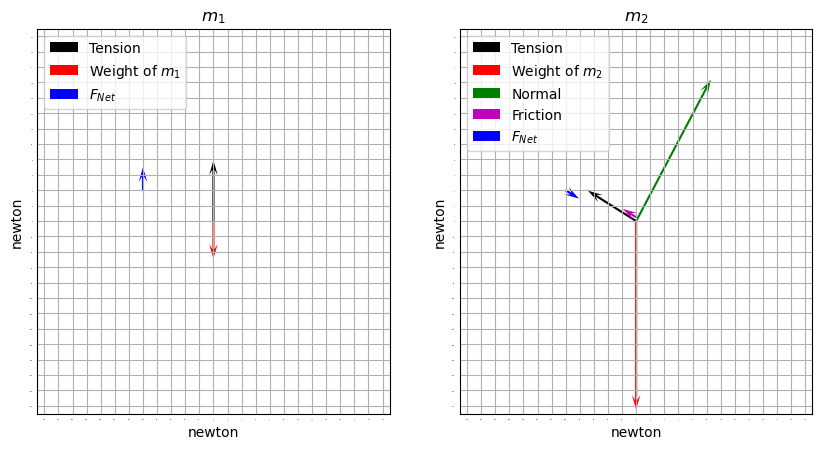

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = ( 10, 5 ) )

g  = 9.8 #m/s^2
m1 = 0.5 #kg
m2 = 2.5 #kg
muk = 0.1 
theta = 30. #deg
theta = np.radians(theta)
s = 25
#m_1:

origin = vector2d(0,0)
fnetpos = vector2d(-10,4)

w1_mag = m1*g
T = vector2d(0,w1_mag+3,label = "Tension",units = ureg.newton)


w1 = vector2d(0,-w1_mag,label = "Weight of $m_1$",units = ureg.newton)
Fnetm1 = T+w1
Fnetm1.label = "$F_{Net}$"

drawvec(ax1,origin,T,width = 2)
drawvec(ax1,origin,w1,color = 'red',width = 2)
drawvec(ax1,fnetpos,Fnetm1,color = 'b',width = 2)

ax1.set_xlim(-s,s)
ax1.set_ylim(-s,s)
ax1.set_title("$m_1$")
ax1.legend(loc = 2)

#m_2:

#define vectors:
w2_mag = m2*g
w2  = polar2vec(w2_mag,300,deg = 1,label = "Weight of $m_2$",units = ureg.newton)

normal = vector2d(0,-w2.y,label = "Normal",units = ureg.newton)

friction = vector2d((T.y-w2.x)*0.5,0,label = "Friction",units = ureg.newton)
tension = vector2d(-T.y,0,\
                   label = "Tension",units = ureg.newton)


#rotate the vectors by -30 deg.:

w2.rotate(-30,deg = True)
normal.rotate(-30,deg = True)
friction.rotate(-30, deg = True)
tension.rotate(-30, deg = True)

#

fnet2 = friction + tension + normal + w2
fnet2.label = "$F_{Net}$"

drawvec(ax2,origin,tension,width = 2)
drawvec(ax2,origin,w2,color = 'r',width = 2)
drawvec(ax2,origin,normal,color = 'g',width = 2)
or_fric = vector2d(0,0.5)
drawvec(ax2,or_fric,friction,color = 'm',width = 2)

drawvec(ax2,fnetpos,fnet2,color = 'b',width = 2)
ax2.set_xlim(-s,s)
ax2.set_ylim(-s,s)
ax2.set_title("$m_2$")

ax2.legend(loc = 2)

#Note that vectors are not to scale since we do not know the magnitude of the tension, 
#friction, etc.!

So you might ask why we rotated the coordinate system in the first place. Well, it is much easier to find the components of 1 vector, the weight of $m_2$ rather than all of the other vectors! Additionally, in the rotated coordinate system the acceleration, which is down the incline, is simply in the $+\hat{i}$ direction.

Now let's move on to solving the problem.

## $m_1$:

$\vec{F}_{Net} =  \sum_{i} \vec{F_i} =  m_1\vec{a}$

There are no forces in the x-direction on $m_1$.

1. $F_{Net_y} = T - m_1 g = m_1 a $

We don't know the values of the tension, $T$ or the magnitude of the block's acceleration, $a$.

But we do know that the pulley is massless (or frictionless, either will work) and $m_1$ and $m_2$ are connected by a taught (massless) string. Since the string is directly transferring the force of $m_1$ to $m_2$ and vice versa, the tension forces acting on each block form an action-reaction pair. So we can equate the magnitudes of the tension forces acting on each block. This will be usefull for $m_2$.

## $m_2$:

After rotating our coordinate system so that $\hat{i}$ is along the incline and $\hat{j}$ is perpendicular to the incline, it is easy to see the system of equations we need to solve:



$\vec{F}_{Net} = m_2\vec{a}$

Let's break this into *x* and *y* components in our rotated coordinate system:

2. $F_{Net_x} = m_2 g\cdot \sin \theta - F_{friction} - T = m_2 a $

3. $F_{Net_y} = m_2g\cdot \cos \theta - N = 0$, since $a_y =  0$

We can also replace $F_{friction}$ in eq. 2 since we know the relationship between the normal force, the coefficient of sliding friction, and the force of friction:

$F_{friction} = \mu_k\cdot N $

We have 3 numbered equations and 3 unknowns ($a$, $N$, and $T$) so we can solve for all 3 unknowns.

To do this in python we need to arrange the equations so that the the unknowns are in the same columns of a matrix. Before we do this, let's reorganize the terms in our equations:


1. $ T - m_1 g = m_1 a $ $~~~~~~~~~~~~~~~~~~~~~~~~~~~\rightarrow~~$ $ m_1 a + 0\cdot N - T = - m_1g  $
2. $ m_2 g \sin \theta - F_{friction} - T = m_2 a $$~~~\rightarrow~~$$ m_2 a + \mu_k N + T = m_2 g \sin \theta$
3. $ m_2g\cdot \cos \theta - N = 0 $$~~~~~~~~~~~~~~~~~~~~\rightarrow~~$$ 0 \cdot a + N + 0 \cdot T = m_2 g \cos \theta $


$$
A \vec{x} = \begin{bmatrix}
m_1 a &  0\cdot N & - 1 \cdot T \\
m_2 a &  \mu_k N  &  1 \cdot T \\
0 \cdot a & 1\cdot N &  0 \cdot T 
\end{bmatrix} = \vec{y} = \left[\begin{array}{c} - m_1g  \\ m_2 g \sin \theta  \\  m_2 g \cos \theta\end{array}\right]$$


From here we can determine the matrix $A$. Since the vector $\vec{x}$ is
$$
\vec{x} = \left[\begin{array}{c} a \\N \\T \end{array}\right]$$

$A$ must be 
$$
A = \begin{bmatrix}
m_1 & 0  & -1 \\
m_2  & \mu_k  & 1 \\
0  & 1 & 0 
\end{bmatrix}
$$

Plugging in $m_1$, $m_2$, and $\mu_k$ we get:

$$
A = \begin{bmatrix}
0.5 & 0  & -1 \\
2.5 & 0.1  & 1 \\
0  & 1 & 0 
\end{bmatrix}
$$

and 

$$\vec{y} = \left[\begin{array}{c} -4.9 \\ 12.25 \\ 21.22 \end{array}\right]$$

In [34]:
A = np.array([[m1,0,-1],\
             [m2,muk,1],\
             [0,1,0]])
y = np.array([-m1*g,m2*g*np.sin(theta),m2*g*np.cos(theta)])

print(A,y)

[[ 0.5  0.  -1. ]
 [ 2.5  0.1  1. ]
 [ 0.   1.   0. ]] [-4.9        12.25       21.21762239]


Let's use numpy's linear algebra tools to solve for the values of $\vec{x}$ using Gauss-Jordan elimination:

In [351]:
x = np.linalg.solve(A,y)
print(x)

[ 1.74274592 21.21762239  5.77137296]


In [368]:
print("The mag. of the acceleration of both blocks is {0:0.2f} m/s^2".format(x[0]))
print("The normal force on block 2 is {0:0.2f} N"\
      .format(x[1]))
print("The tension force acting on each block is {0:0.2f} N"\
      .format(x[2]))
print("Bonus: The force of friction on block 2 is {0:0.2f} N"\
      .format(x[2]*muk))

The mag. of the acceleration of both blocks is 1.74 m/s^2
The normal force on block 2 is 21.22 N
The tension force acting on each block is 5.77 N
Bonus: The force of friction on block 2 is 0.58 N


# Inheritance and More Operator Overloading

In [26]:
import numpy as np

Last time we saw how you can make your own data type by creating a new class; e.g. :

In [28]:
class Time : 
    def __init__(self, hour=0, minute=0, second=0):    #--> special method for initializing class
        self.hour   = hour
        self.minute = minute
        self.second = second
        
        
    def __str__(self):                                 # --> return string with print command
        return ('%.2d:%.2d:%.2d' % (self.hour, self.minute, self.second ) )


We also saw attributes, the named elements of your class and how you can create an instance of the class; e.g.:

In [29]:
my_time =  Time()

In [30]:
my_time.hour = 9
my_time.minute = 45

In [31]:
print( my_time)

09:45:00


We added functions in our class, the methods, that are associated with the particular class; e.g.:

In [32]:
class Time :
    """Represents the time of day."""
    
    def __init__(self, hour=0, minute=0, second=0):    #--> special method for initializing class
        self.hour   = hour
        self.minute = minute
        self.second = second
        
        
    def __str__(self):                                 # --> return string with print command
        return ('%.2d:%.2d:%.2d' % (self.hour, self.minute, self.second ) )

    def valid_time(self):
        if self.hour < 0 or self.minute < 0 or self.second < 0:
            return False
        if self.minute >= 60 or self.second >= 60:
            return False
        return True
        
    def time_to_int(self):
        minutes = self.hour * 60 + self.minute
        seconds = minutes   * 60 + self.second
        return seconds

    def is_after(self, other):
        if not self.valid_time() or not other.valid_time():
            raise ValueError("Invalid Time object in add_time()")
        return self.time_to_int() > other.time_to_int()


In [33]:
time_1 = Time()
time_2 = Time()


time_1.hour   = 3
time_1.minute = 35

time_2.hour   = 3
time_2.minute  = 38


print( time_2.is_after( time_1 ) )

print(time_2)

True
03:38:00


### Let's revisit operator overloading, and practice some more examples.

***Operator overloading*** allows you to change the behavior of an operator (e.g. + -) so that it works in a *programmer* defined way.

**e.g.** the `+` operation on strings makes more sense as string concatenation. What would it even mean to add strings otherwise?

In [100]:
compound_word = 'tree' + 'house'
print(compound_word,type(compound_word))
print(compound_word.capitalize())

treehouse <class 'str'>
Treehouse


In [101]:
# This function is the only one not operating on a Time.  It cannot be
# in the class Time, because its "self" argument would be undefined
# when called.  So, it appears out here, would be in the module, but not in the
# class.

def int_to_time(seconds):
    time = Time()
    minutes,   time.second = divmod(seconds, 60)
    time.hour, time.minute = divmod(minutes, 60)
    return time

#--------------------------------------------------
class Time :
    """Represents the time of day."""
    
    def __init__(self, hour=0, minute=0, second=0):    #--> special method for initializing class
        self.hour   = hour
        self.minute = minute
        self.second = second
        
        
    def __str__(self):                                 # --> return string with print command
        return ('%.2d:%.2d:%.2d' % (self.hour, self.minute, self.second ) )

    def valid_time(self):
        if self.hour < 0 or self.minute < 0 or self.second < 0:
            return False
        if self.minute >= 60 or self.second >= 60:
            return False
        return True
        
    def time_to_int(self):
        minutes = self.hour * 60 + self.minute
        seconds = minutes   * 60 + self.second
        return seconds

    def is_after(self, other):
        if not self.valid_time() or not other.valid_time():
            raise ValueError("Invalid Time object in add_time()")
        return self.time_to_int() > other.time_to_int()
    
    
### this is the function where we use operator overloading :
    def __add__(self, other):                              # when you see the "+" you will do the following:
        seconds = self.time_to_int() + other.time_to_int()
        return int_to_time(seconds)



start = Time(9, 45)
duration = Time(1, 35)
print(start + duration) # ---> 11:20:00 (+ becomes the __add__ function)

11:20:00


In [102]:
t = Time(-4,3,2)
print(t)
#t.is_after(start)
print(6>4)

-04:03:02
True


### Let's try out some more operator overloading cases:

In [103]:
class my_test_overloads :
    
    def __lt__( self, other ): 
        
        if ( self.a < other.a ): 
            return "number_1 < number_2 "
        else: 
            return "number_2 < number_1 "
        
    def __gt__( self, other ): 
        
        if ( self.a > other.a ): 
            return "number_1 > number_2 "
        else: 
            return "number_2 > number_1 "
        
    def __eq__( self, other ): 
        
        if( self.a == other.a ): 
            return "number_1 == number_2 "
        else: 
            return "number_1 != number_2 "
        
    def __sub__( self, other ):
        
        return self.a - other.a 
    
    def __add__( self, other ):
        
        return self.a + other.a
    
    def __mul__( self, other ):
        
        return self.a / other.a
    
    
    def __floordiv__( self, other ) :
        
        return self.a // other.a 
    
    def __truediv__( self, other ) :
        
        return self.a * other.a 
    
    def __mod__ ( self, other ):
        
        return self.a % other.a
    

In [104]:
q1 = my_test_overloads( )
q2 = my_test_overloads( )

In [105]:
q1.a = 12
q2.a = 5

In [106]:
print( q1 + q2 )

17


In [107]:
print( q1 * q2 ) #?? What happened?

2.4


In [108]:
print( q1 > q2 )

number_1 > number_2 


In [109]:
12 > 5

True

In [110]:
print( q1 < q2 )

number_2 < number_1 


In [111]:
print ( q1 / q2 )

60


In [112]:
print( q1 // q2 )

2


In [113]:
print( q1 % q2 )

2


In [114]:
class my_test_overloads_b :

    def __lt__( self, other ): 
        
        if ( len(self.a) < len(other.a) ): 
            return "word_1 shorter than word_2 "
        else: 
            return "word_2 shorter than word_1 "
        
    def __gt__( self, other ): 
        
        if ( len(self.a) > len(other.a) ): 
            return "word_1 longer than word_2 "
        else: 
            return "word_2 longer than word_1 "

In [115]:
word_A = my_test_overloads_b()
word_B = my_test_overloads_b()

In [116]:
word_A.a = 'test'
word_B.a = 'maybe'

In [117]:
word_A > word_B

'word_2 longer than word_1 '

In [118]:
word_A < word_B

'word_1 shorter than word_2 '

In [119]:
print(len("word")<len("timee"))

True


## Inheritance
***Inheritance*** is the ability to define a new class that is a modified version of an existing (*parent*) class; i.e., we don't need to redefine all methods that we already defined in the parent class, we can just use them in the *child* class and potentially add some more..

**EXAMPLE:**
- Let's create a *parent* class `photon` with some attributes and methods. We'll initialize it with a wavelength in nanometers (nm) and a phase angle in radians and use the following equations to define its attributes.
- Next we'll define a *child* class `laser_beam` that *inherits* the structure of photon.
- Equations:

  Input: wavelength ($\lambda$)

  1. Reduced Plank's Constant: $\hbar = \frac{6.626 \times 10^{-34}}{2 \pi} \mathrm {J \cdot s}$
  2. Speed of light, c: $2.99792 \times 10^{8} \mathrm{\frac{m}{s}}$
  3. Wave number: $k = \frac{2\pi}{\lambda}$
  4. Angular frequency: $\omega = \frac{c}{k}$
  5. Momemtum: $p = \hbar k$
  6. Energy: $E = \hbar \omega$ 

  

In [70]:
class Photon():
    """
    Class of single travelling photons traveling in 1 dimension.
    """
    hbar = 6.626e-34 #Js
    c = 2.99792e8 #m/s 
    
    def __init__(self,lam = 500, phase = 0):
        self.lam = lam*1e-9 # m
        self.phase = phase #radians
       
    def wavenumber(self):
        k = 2*np.pi/self.lam
        return k

    def frequency(self):
        f = self.c/self.lam
        return f

    def ang_freq(self):
        w = 2*np.pi*self.frequency()
        return w
    
    def momentum(self):
        p = self.hbar*self.wavenumber() #kg * m/s
        return p

    def Energy(self):
        E = self.hbar*self.ang_freq()
        return E              

In [71]:
class laser_beam(Photon):
    """
    Class of laser beams consisting of a flux of N travelling photons per  
    picosecond (1 ps = 10^-12 s) traveling in 1 dimension, all with the same phase.
    Initialized with beam energy, diameter in mm, wavelength, and phase.
    """

    def __init__(self,photons = 500, lam = 500, diameter = 5, phase = 0):

        self.photons = photons
        self.lam = lam*1e-9 #m
        self.diameter = diameter*1e-3 #m
        self.phase = phase #radians

    def beam_energy(self):

        beam_E = self.photons*self.Energy()
        return beam_E

    def beam_area(self):
        area = np.pi*(self.diameter/2)**2
        return area

    def __str__(self):

        picosec = 1e-12 #s
        p1 = f"Power: {self.Energy()*self.photons/picosec} W."
        p2 = f"Wavelength: {self.lam*1e9} nanometers."
        p3 = f"Phase at target: {np.degrees(self.phase)} deg."
        p4 = f"Flux: {self.beam_energy()/self.beam_area()/picosec} W/m^2."
        return p1+'\n' + p2 + '\n' + p3 + '\n' + p4
        
        
        

In [73]:
redlaser = laser_beam(5000,656,5,np.pi)

In [74]:
print(redlaser)

Power: 0.009513000165667486 W.
Wavelength: 656.0 nanometers.
Phase at target: 180.0 deg.
Flux: 484.4931199999999 W/m^2.


In [243]:
print(f"The single photon energy is {redlaser.Energy()} W.")

The single photon energy is 1.902600033133497e-18 W.


In [246]:
print(f"The frequency is {redlaser.frequency()} Hz")

The frequency is 456999999999999.94 Hz


In [249]:
print(redlaser.ang_freq()/2/np.pi)

456999999999999.94


## *Think Python* Example: Building card games

In [35]:
### define the cards you will be playing with

class Card:
    """Represents a standard playing card.
    
    Attributes:
      suit: integer 0-3
      rank: integer 1-13
    """
### In order to print Card objects in a way that people can easily read, we need a mapping
### from the integer codes to the corresponding ranks and suits. A natural way to do that is
### with lists of strings. We assign these lists to class attributes suit_names and rank_names:

    suit_names = ["Clubs", "Diamonds", "Hearts", "Spades"]
    rank_names = [None, "Ace", "2", "3", "4", "5", "6", "7", 
              "8", "9", "10", "Jack", "Queen", "King"]

    def __init__(self, suit=0, rank=2):
        self.suit = suit
        self.rank = rank

    def __str__(self):
        """Returns a human-readable string representation."""
        return '%s of %s' % (Card.rank_names[self.rank],
                             Card.suit_names[self.suit])

### test which card is stronger than the other:    
    def __eq__(self, other):
        """Checks whether self and other have the same rank and suit.

        returns: boolean
        """
        return self.suit == other.suit and self.rank == other.rank

    def __lt__(self, other):
        """Compares this card to other, first by suit, then rank.

        returns: boolean
        """
        t1 = self.suit, self.rank
        t2 = other.suit, other.rank
        return t1 < t2

In [37]:
# let's see it in practice:

card1 = Card(3, 13)

print( card1)

King of Spades


In [38]:
# make another card and test if it is stronger than the first one:
card2 = Card(1, 2)

print(card1, card2)

print( card2 > card1)

King of Spades 2 of Diamonds
False


### Make a class deck that at the init method creates the attribute cards and generates the standard set of fifty-two cards:

In [44]:


import random

class Deck:
    """Represents a deck of cards.

    Attributes:
      cards: list of Card objects.
    """
    
    def __init__( self ):
        """Initializes the Deck with 52 cards.
        """
        self.cards = []
        for suit in range( 4 ):
            for rank in range( 1, 14 ):
                card = Card( suit, rank )   # --> call the class card() and make your full set of cards
                self.cards.append( card )

    def __str__( self ):
        """Returns a string representation of the deck.
        """
        res = []                        #--> create a list where we store our Deck card names
        for card in self.cards:         #--> loop over cards and append to list
            res.append( str( card ) )
        return '\n'.join( res )         #--> use function join() to join the names with a \n between them

    
# define all the actions you will do with cards : 
    def add_card( self, card ):
        """Adds a card to the deck.

        card: Card
        """
        self.cards.append( card )

    def remove_card( self, card ):
        """Removes a card from the deck or raises exception if it is not there.
        
        card: Card
        """
        self.cards.remove( card )
        
    def pop_card( self, i = -1 ):
        """Removes and returns a card from the deck.

        i: index of the card to pop; by default, pops the last card.
        """
        return self.cards.pop( i )

    def shuffle( self ):
        """Shuffles the cards in this deck."""
        random.shuffle( self.cards )

    def sort( self ):
        """Sorts the cards in ascending order."""
        self.cards.sort()

    def move_cards( self, hand, num ):
        """Moves the given number of cards from the deck into the Hand.

        hand: destination Hand object
        num: integer number of cards to move
        """
        for i in range( num ):
            hand.add_card( self.pop_card() )


In [46]:
# print the full deck of cards:
deck = Deck()

deck.shuffle()
print(deck)

3 of Hearts
Jack of Clubs
Ace of Clubs
10 of Diamonds
10 of Clubs
4 of Clubs
Queen of Diamonds
3 of Spades
2 of Diamonds
King of Spades
6 of Diamonds
6 of Clubs
4 of Diamonds
Ace of Diamonds
Ace of Hearts
2 of Clubs
10 of Hearts
7 of Spades
9 of Spades
6 of Spades
10 of Spades
Jack of Diamonds
7 of Diamonds
4 of Hearts
3 of Clubs
King of Clubs
8 of Spades
8 of Diamonds
Queen of Spades
5 of Hearts
Ace of Spades
9 of Diamonds
2 of Spades
5 of Diamonds
7 of Clubs
Jack of Hearts
8 of Hearts
7 of Hearts
5 of Clubs
9 of Hearts
5 of Spades
3 of Diamonds
Queen of Hearts
Queen of Clubs
9 of Clubs
King of Hearts
4 of Spades
Jack of Spades
6 of Hearts
8 of Clubs
King of Diamonds
2 of Hearts


### Now let's create a child class `Hand` that will use the information from parent class Deck to create a hand of cards:

In [255]:
class Hand(Deck):
    """Represents a hand of playing cards."""
    
    def __init__(self, label=''):         # --> it has its own init, which overrides the one from Deck
        self.cards = []
        self.label = label


In [256]:
my_hand = Hand('new hand')

print( my_hand.cards )


[]


In [257]:
# we can add cards to our hand:
deck = Deck()
card = deck.pop_card()

my_hand.add_card(card)
print(my_hand)

King of Spades


In [258]:
card = deck.pop_card()  # take another card (remember it's always from bottom here )

my_hand.add_card(card)
print(my_hand)

King of Spades
Queen of Spades


In [259]:
card = deck.pop_card()  
my_hand.add_card(card)
print(my_hand)

King of Spades
Queen of Spades
Jack of Spades


In [260]:
def find_defining_class(obj, method_name):
    """Finds and returns the class object that will provide 
    the definition of method_name (as a string) if it is
    invoked on obj.

    obj: any python object
    method_name: string method name
    """
    for ty in type(obj).mro():
        if method_name in ty.__dict__:
            return ty
    return None


# if we are in the main code do the following:

if __name__ == '__main__':
    deck = Deck()
    deck.shuffle()

    hand = Hand()
    print(find_defining_class(hand, 'shuffle'))

    deck.move_cards(hand, 5)
    hand.sort()
    print(hand)

<class '__main__.Deck'>
3 of Clubs
5 of Diamonds
8 of Diamonds
Queen of Diamonds
7 of Spades


### Practice:

- Let's create a class `Sensor` that initializes with attributes `name, location, record_date,` and an empty dictionary called `data`
- Add a method called `add_data` which will store the two arrays: time and data with keys 'time' and 'data' in the data dictionary.
- Add another method called `clear_data` which empties the `data` dictionary. 

In [49]:
class Sensor():
    def __init__(self, name, location, record_date):
        self.name = name
        self.location = location
        self.record_date = record_date
        self.data = {}
        
        
    def add_data(self, t, data):
        self.data['time'] = t
        self.data['data'] = data
        
        print(f'We have {len(data)} points saved')        
        
    def clear_data(self):
        self.data = {}
        print('Data cleared!')

## Inherit and update attributes with *super*

Let's see we want to create a class **NewSensor** that inherit from *Sensor* class, but with updated the attributes by adding a new attribute *brand*. We can of course re-define the whole *\_\_init__* method as shown below. 

But we don't want to re-type all the code as before for all the attributes, this is especially true if we have tens of attributes. Therefore, there is a more concise and popular way to do it: we can use the **super** method to avoid referring to the parent class explicitly. Let's see the following example:

**EXAMPLE:** Use *super* method to redefine the attributes. 

In [50]:
class NewSensor(Sensor):
    def __init__(self, name, location, record_date, brand):
        self.name = name
        self.location = location
        self.record_date = record_date
        self.brand = brand
        self.data = {}
        
new_sensor = NewSensor('OK', 'SF', '2019-03-01', 'XYZ')
new_sensor.brand

'XYZ'

In [51]:
class NewSensor(Sensor):
    def __init__(self, name, location, record_date, brand):
        super().__init__(name, location, record_date)
        self.brand = brand
        
new_sensor = NewSensor('OK', 'SF', '2019-03-01', 'XYZ')
new_sensor.brand

'XYZ'

## Summary


1. OOP and POP are different. OOP has many benefits and is often more appropriate for use in large-scale projects.
2. A *Class* is the blueprint of the structure that allows us to group data and methods, while an *object* is an instance from the class.
3. The concept of "inheritance" is key to OOP, which allows us to refer attributes or methods from the superclass.
5. The concept of "polymorphism" allows us to use common operation in different ways for different data input for example operator overloa.

## Problems

1. Describe what are the differences of classes versus objects.
2. Describe why we use self as the first argument in the methods. 
3. What is a constructor? And why do we use it?
4. Describe the differences between class and instance attributes. 
5. The following is a definition of the class *Point* that takes in the coordinate x, y. Add a method *plot_point* that plot the position of point. 

    ```python
   import matplotlib.pyplot as plt

   class Point():
       def __init__(self, x, y):
           self.x = x
           self.y = y
    ```
6. Use the class from problem 5, add a method *calculate_dist* which takes in x and y from another point, and returns the distance calculated between the two points.  
7. What's inheritance? 
8. How do we inherit from a superclass and add new methods?
9. When we inherit from a superclass, we need to replace a method with a new one, how do we do that?
10. What's the super method? Why do we need it?
11. Create a class to model some real world object and create a new class to inherit from it. One example can be the following. You should use a different example and use as many things we learned as possible. 

## Practice: 

1. You have a water-air interface. Light comes in at an angle of $24^\circ$  to the vertical. At what angle will it travel in the water (what is the angle of refraction)? 

    - Make a function snell_angle that takes as input a list with the incoming angle of light, and the two refractive indices of the two materials the light moves to/from. The function should then use Snell's law to calculate the angle of refraction and return that angle. Remember that from Snell's law: $\frac{\sin\theta_1}{\sin\theta_2} = \frac{n2}{n1}$.  

    - Call the function for light moving from air to water with an angle of incidence of $24^\circ$ (remember that the refractive indices of water and air are approximately 1.333 and 1).  

    - What will the angle of refraction be for light moving from air to an acrylic surface ( $n_2$  = 1.49) for the same incidence angle? 



2. Get file test_input.dat Make a code that reads it line by line, and: 
    - if the line has more than 50 characters it prints the number of "a"s and "w"s the line has and the number of words that have a "c"
    - if the line has less than 24 characters it will print the words that have an "e".

3.  Open discussion: What will the following code print/ why?

`list_of_letters = [ 'M', 'a', 'p', 'l', ''e, 'h' , 'u' , 't', 's']`

`for letter in 'Mary Poppins flied away with her umbrella ':`

`    if letter not in list_of_letters:`

`        print(letter)`


4. Projectile motion is a form of motion experienced by an object or particle that is thrown near the Earth's surface and moves along a curved path under the action of gravity only. In this example you will study the parabolic motion of objects with different initial speeds and angles.  Create function `balistics_planet( gravity, balistics_obj )` that gets as input a dictionary `gravity` and a dictionary `balistics_obj` and returns the maximum altitude the projectile reached (`y_max`) and the total time it traveled (`t`) to get there.  

`gravity` should have as keys the names of the four terrestrial planets (Mercury, Venus, Earth and Mars) and as values the acceleration of the four terrestrial planets: (3.7 ,  8.87 , 9.81 and 3.71). 

`balistics_obj` should have as keys the names of the four terrestrial planets and as keys lists containing the following information for the initial speed and angle of the projectile on each planet:
Planet |	Mercury|	Venus|	Earth	|Mars
--|:---------:|:---------:|:---------:|:---------:
Initial Speed ($v_0$)	|0.2|	2.8|	8.81|	1.71
Angle ($\theta$)	|30|	32|	50	|22
 

Remember that:

$t = \frac{2 \cdot v_0 \cdot \sin(\theta)}{g}$

and

$y_{max} = \frac{v_0^2  \cdot \sin(\theta)^2}{2 \cdot g}$ . 


- Call `balistics_planet(gravity,balistics_obj)`.
- Print an informative sentence about the total time each projectile travelled on each planet and what the maximum altitude it reached.
  
   **e.g.**:
  `On Mercury the object with a starting speed of 0.2 and an angle of 30.0 degrees will travel for a total of ___ seconds to reach a maximum of ___ meters."`

- Format the statement so that y_max and t have are accurate to 3 digits beyond the decimal.



In [ ]:
#3.7 , 8.87 , 9.81 and 3.71
gravity = {"Mercury": 3.7, "Venus":8.87, 'Earth': 9.81, "Mars":3.71}
balistics_obj = { "Mercury":[0.2,  30],
                  "Venus"  :[2.8,  32], 
                  "Earth"  :[8.81, 50],
                  "Mars"   :[1.71, 22] }

In [ ]:
#Solve the problem!

In [ ]:
# On  Mercury the object with a starting speed of  0.2 and an angle of 30.0  degrees will 
# travel for a total of 0.0541 and reach a maximum of 0.0014 meters.
# On  Venus the object with a starting speed of  2.8 and an angle of 32  degrees will 
# travel for a total of 0.3346 and reach a maximum of 0.1241 meters.
#On  Earth the object with a starting speed of  8.81 and an angle of 50  degrees 
# will travel for a total of 1.3759 and reach a maximum of 2.3215 meters.
#On  Mars the object with a starting speed of  1.71 and an angle of 22  degrees will 
# travel for a total of 0.3453 and reach a maximum of 0.0553 meters.

5. Make a function called `exo_kepler_3rd(period, m_star)` that gets as input the orbital period $T$ of a planet in years and the mass of its parent star $M$ in Solar Masses, and returns the orbital distance $a$ from the star to the planet. Since the mass of the star $M$ could be different than that of the Sun, we'll use Newton's version of Kepler’s $3^{rd}$ law:
   
   $\frac{GM}{4\pi^2} \cdot T^2 = a^3$.

    so the ratio is $\frac{M_1}{M_2} \times \left(\frac{T_1}{T_2}\right)^2=\left(\frac{a_1}{a_2}\right)^3 $ 

    - Use the properties of our Sun (1 $M_\odot$) and Earth (a = 1 AU, T = 365 days) as a point of reference. Write an appropriate docstring. Call `exo_kepler_3rd`  for the following exoplanets:

Planet | Period [days]  | Parent star mass (solar masses)
--|:---------:|:---------:
HR8799c	| 232 Earth years | 1.47
NGTS-10b	| 0.76  | 0.696
GJ1214b	| 1.58 | 0.176


- What does the distance of these planets to their parent star imply for the conditions of these planets?

